In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | orbetello
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | tigzirt
Processing Record 8 of Set 1 | willowmore
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | goderich
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | ukiah
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | dhidhdhoo
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | g

Processing Record 37 of Set 4 | ugoofaaru
Processing Record 38 of Set 4 | ilesha
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | les cayes
Processing Record 41 of Set 4 | werda
Processing Record 42 of Set 4 | totness
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | tasiilaq
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | san policarpo
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | sulangan
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | halifax
Processing Record 4 of Set 5 | mahajanga
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | katangli
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | valle de allende
Processing Record 9 of Set 5 | ust-ilimsk
Processing Record 10 of Set

City not found. Skipping...
Processing Record 28 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 29 of Set 8 | lavrentiya
Processing Record 30 of Set 8 | matay
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | pochutla
Processing Record 33 of Set 8 | clyde river
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | sehore
Processing Record 36 of Set 8 | saint george
Processing Record 37 of Set 8 | ciudad bolivar
Processing Record 38 of Set 8 | synya
Processing Record 39 of Set 8 | vega de alatorre
Processing Record 40 of Set 8 | marovoay
Processing Record 41 of Set 8 | tubruq
City not found. Skipping...
Processing Record 42 of Set 8 | pangnirtung
Processing Record 43 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 44 of Set 8 | najran
Processing Record 45 of Set 8 | nenjiang
Processing Record 46 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 8 | fort nelson
Processing Record 48

Processing Record 18 of Set 12 | mahon
Processing Record 19 of Set 12 | barra do garcas
Processing Record 20 of Set 12 | menongue
Processing Record 21 of Set 12 | san matias
Processing Record 22 of Set 12 | saint-jerome
Processing Record 23 of Set 12 | kissidougou
Processing Record 24 of Set 12 | yerbogachen
Processing Record 25 of Set 12 | pozo colorado
Processing Record 26 of Set 12 | fagersta
Processing Record 27 of Set 12 | dicabisagan
Processing Record 28 of Set 12 | harur
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | dharchula
Processing Record 31 of Set 12 | olinda
Processing Record 32 of Set 12 | lodingen
Processing Record 33 of Set 12 | maykain
City not found. Skipping...
Processing Record 34 of Set 12 | wuan
Processing Record 35 of Set 12 | peruibe
Processing Record 36 of Set 12 | liberal
Processing Record 37 of Set 12 | le moule
Processing Record 38 of Set 12 | nouadhibou
Processing Record 39 of Set 12 | vestmannaeyjar
Processing Record 40 of Set 

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,51.04,79,39,15.35,AU,2021-07-13 19:52:44
1,Narsaq,60.9167,-46.0500,50.32,72,62,5.14,GL,2021-07-13 19:52:45
2,Guerrero Negro,27.9769,-114.0611,82.94,48,23,11.48,MX,2021-07-13 19:52:45
3,Orbetello,42.4408,11.2196,78.62,88,27,3.44,IT,2021-07-13 19:52:45
4,Mataura,-46.1927,168.8643,32.09,90,72,4.68,NZ,2021-07-13 19:52:46
5,Saint-Philippe,-21.3585,55.7679,69.39,73,19,11.74,RE,2021-07-13 19:52:46
6,Tigzirt,36.8886,4.1198,72.30,78,1,6.64,DZ,2021-07-13 19:52:46
7,Willowmore,-33.2926,23.4895,36.61,90,60,6.98,ZA,2021-07-13 19:52:47
8,Rikitea,-23.1203,-134.9692,74.14,73,5,14.88,PF,2021-07-13 19:50:10
9,New Norfolk,-42.7826,147.0587,47.75,86,100,1.81,AU,2021-07-13 19:52:47


In [23]:
#Reorder columns
city_data_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[city_data_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-07-13 19:52:44,-33.6500,115.3333,51.04,79,39,15.35
1,Narsaq,GL,2021-07-13 19:52:45,60.9167,-46.0500,50.32,72,62,5.14
2,Guerrero Negro,MX,2021-07-13 19:52:45,27.9769,-114.0611,82.94,48,23,11.48
3,Orbetello,IT,2021-07-13 19:52:45,42.4408,11.2196,78.62,88,27,3.44
4,Mataura,NZ,2021-07-13 19:52:46,-46.1927,168.8643,32.09,90,72,4.68
5,Saint-Philippe,RE,2021-07-13 19:52:46,-21.3585,55.7679,69.39,73,19,11.74
6,Tigzirt,DZ,2021-07-13 19:52:46,36.8886,4.1198,72.30,78,1,6.64
7,Willowmore,ZA,2021-07-13 19:52:47,-33.2926,23.4895,36.61,90,60,6.98
8,Rikitea,PF,2021-07-13 19:50:10,-23.1203,-134.9692,74.14,73,5,14.88
9,New Norfolk,AU,2021-07-13 19:52:47,-42.7826,147.0587,47.75,86,100,1.81


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

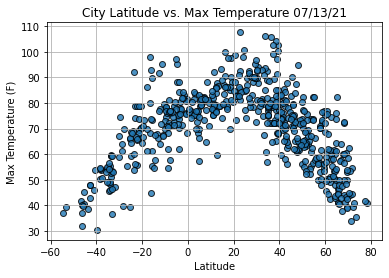

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


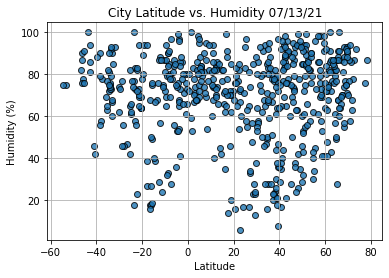

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

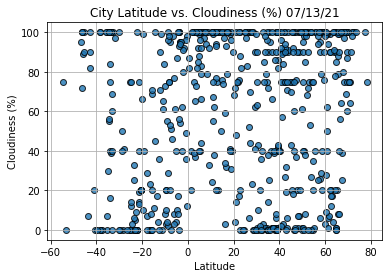

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

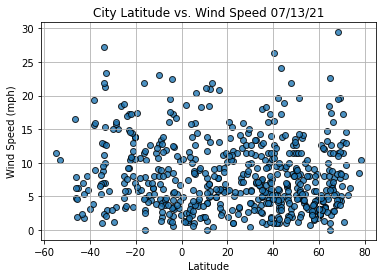

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()